In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
dataset = pd.read_csv('train.csv')

In [3]:
dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
dataset.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [5]:
dataset.dropna(axis = 0, inplace = True)

In [6]:
dataset.isna().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [7]:
dataset.reset_index(inplace = True)

<AxesSubplot:xlabel='label', ylabel='count'>

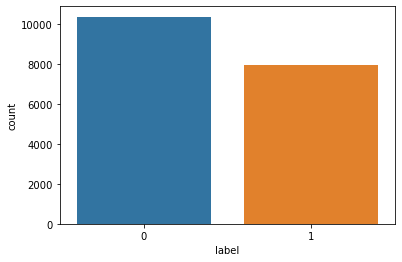

In [11]:
#balanced or inbalanced data checking

sns.countplot(x = dataset['label'], data = dataset)

Therefore Balanced

In [12]:
data = dataset['title'][0]
data

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [13]:
#Regular Expression
import re

In [14]:
#Data Preprocessing
data = re.sub('[^a-zA-Z]', ' ' , data)
data

'House Dem Aide  We Didn t Even See Comey s Letter Until Jason Chaffetz Tweeted It'

In [15]:
data = data.lower()
data

'house dem aide  we didn t even see comey s letter until jason chaffetz tweeted it'

In [16]:
list = data.split()
list

['house',
 'dem',
 'aide',
 'we',
 'didn',
 't',
 'even',
 'see',
 'comey',
 's',
 'letter',
 'until',
 'jason',
 'chaffetz',
 'tweeted',
 'it']

In [20]:
#Importing Natural Language Toolkit
import nltk

In [21]:
#Downloading Stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rohankumar/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [24]:
#Removing the stopwords from the text if any
ps = PorterStemmer()
review = [ps.stem(word) for word in list if word not in set(stopwords.words('english'))]
review

['hous',
 'dem',
 'aid',
 'even',
 'see',
 'comey',
 'letter',
 'jason',
 'chaffetz',
 'tweet']

In [25]:
' '.join(review)

'hous dem aid even see comey letter jason chaffetz tweet'

In [26]:
corpus = []

for i in range(0, len(dataset)):
    review = re.sub('[^a-zA-Z]', ' ', dataset['title'][i])
    review = review.lower()
    list = review.split()
    review = [ps.stem(word) for word in list if word not in set(stopwords.words('english'))]
    corpus.append(' '.join(review))

In [27]:
corpus[0]

'hous dem aid even see comey letter jason chaffetz tweet'

In [28]:
#bag of words model - representing a text in vector form
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()

In [29]:
y = dataset['label']

In [30]:
#Training set and Test set Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [32]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [34]:
y_pred = classifier.predict(X_test)

array([[2427,  290],
       [ 156, 1699]])

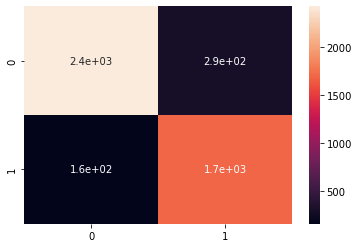

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)
cm

In [36]:
#Accuracy of the model
accuracy_score(y_pred, y_test)

0.9024496937882764